**Prática de Suavização de Imagens**

(filtro passa baixa)

Exercícios retirados de:
http://homepages.inf.ed.ac.uk/rbf/HIPR2/mean.htm

http://homepages.inf.ed.ac.uk/rbf/HIPR2/gsmooth.htm

http://homepages.inf.ed.ac.uk/rbf/HIPR2/median.htm

1)	Aplique o filtro de Média a imagem abaixo para diferentes tamanhos de máscaras.
- 3x3; 7x7; 3x3 aplicado três vezes sequenciais.

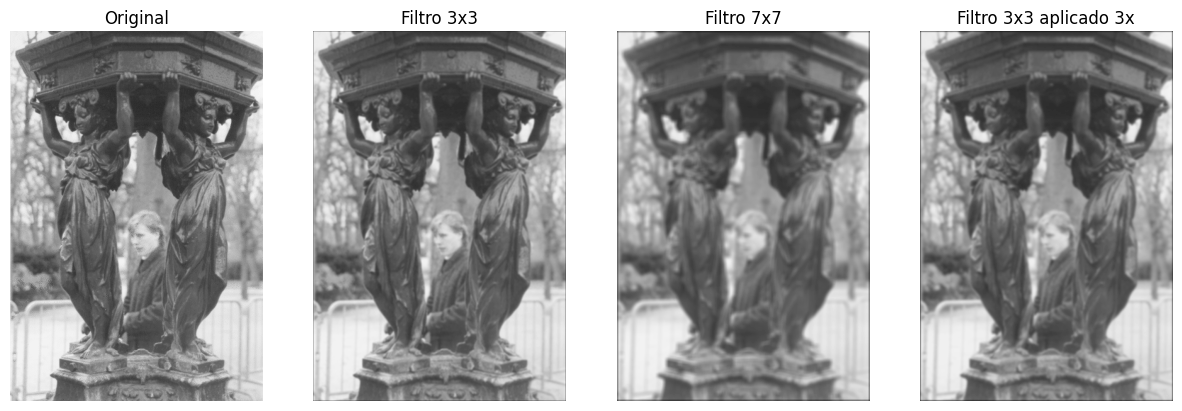

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Ler a imagem em escala de cinza
img1 = cv2.imread("sta2.png", cv2.IMREAD_GRAYSCALE)

# Função para adicionar padding
def adicionar_padding(imagem, altura_mascara, largura_mascara):
    margem_altura = altura_mascara // 2
    margem_largura = largura_mascara // 2
    imagem_padded = np.pad(imagem, ((margem_altura, margem_altura), (margem_largura, margem_largura)), mode='constant')
    return imagem_padded

# Função para aplicar a convolução com uma máscara
def aplicar_convolucao(img, mascara):
    altura_mascara, largura_mascara = mascara.shape
    imagem_padded = adicionar_padding(img, altura_mascara, largura_mascara)
    resultado = np.zeros_like(img)

    # Aplicar a convolução manualmente
    for i in range(altura_mascara // 2, imagem_padded.shape[0] - altura_mascara // 2):
        for j in range(largura_mascara // 2, imagem_padded.shape[1] - largura_mascara // 2):
            janela = imagem_padded[i - altura_mascara // 2:i + altura_mascara // 2 + 1,
                                   j - largura_mascara // 2:j + largura_mascara // 2 + 1]
            resultado[i - altura_mascara // 2, j - largura_mascara // 2] = np.sum(janela * mascara)
    
    return np.clip(resultado, 0, 255).astype(np.uint8)

# Definir as máscaras
mascara_3x3 = np.ones((3, 3)) / 9
mascara_7x7 = np.ones((7, 7)) / 49

# Aplicar o filtro de média para diferentes máscaras
media_3x3 = aplicar_convolucao(img1, mascara_3x3)
media_7x7 = aplicar_convolucao(img1, mascara_7x7)

# Aplicar o filtro de 3x3 três vezes sequenciais
media_3x3_2 = aplicar_convolucao(media_3x3, mascara_3x3)
media_3x3_3 = aplicar_convolucao(media_3x3_2, mascara_3x3)

# Mostrar os resultados
fig, axs = plt.subplots(1, 4, figsize=(15, 5))

axs[0].imshow(img1, cmap='gray', vmin=0, vmax=255)
axs[0].set_title('Original')

axs[1].imshow(media_3x3, cmap='gray', vmin=0, vmax=255)
axs[1].set_title('Filtro 3x3')

axs[2].imshow(media_7x7, cmap='gray', vmin=0, vmax=255)
axs[2].set_title('Filtro 7x7')

axs[3].imshow(media_3x3_3, cmap='gray', vmin=0, vmax=255)
axs[3].set_title('Filtro 3x3 aplicado 3x')

for ax in axs:
    ax.axis('off')

plt.show()


2)	Aplique o filtro Gaussiano à imagem abaixo para diferentes valores de desvio padrão (σ) e tamanho de máscara.
- σ = 1.0 (kernel size 5×5).	σ = 2.0 (kernel size 9×9).	σ =  4.0 (kernel size 15×15).

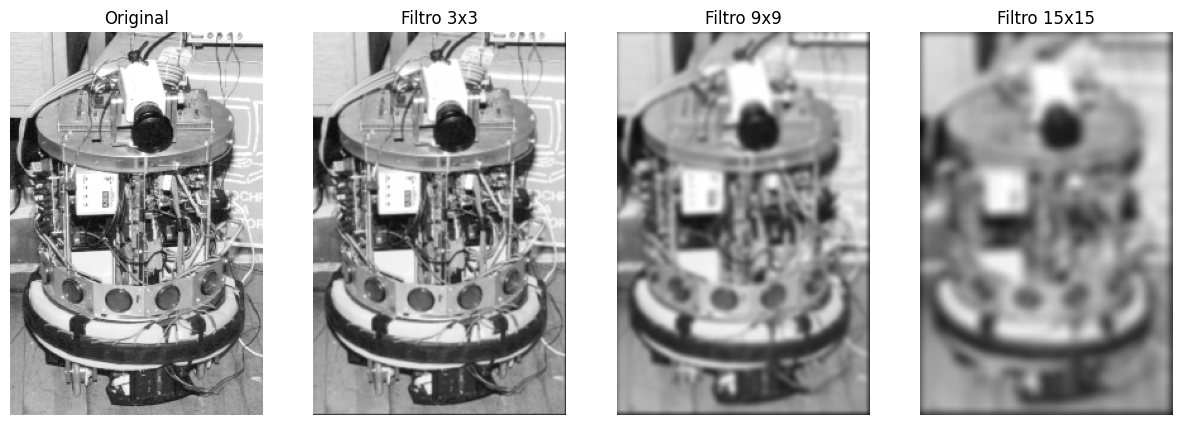

In [2]:
#  code here
img2 = cv2.imread("ben2.png", cv2.IMREAD_GRAYSCALE)

# plt.imshow(img2, cmap='gray', vmin=0, vmax=255)

def g(x,y,sigma):
    fator = (1/ (2*np.pi*(sigma**2)))
    result = fator * np.exp( -(x**2 + y**2) / (2*(sigma**2)))
    
    return result

def criar_mascara(tamanho,sigma):
    result = np.zeros((tamanho,tamanho))
    a = tamanho//2
    b = tamanho//2
    
    for x in range(-a, a):
        for y in range(-b, b):
            result[x+a+1, y+b+1] = g(x,y,sigma)
    result = result/np.sum(result[:])
    
    return result

sigma_3x3 = 1
sigma_9x9 = 2
sigma_15x15 = 4

tamanho_3x3 = 3
tamanho_9x9 = 9
tamanho_15x15 = 15

mascara_3x3 = criar_mascara(tamanho_3x3, sigma_3x3)
mascara_9x9 = criar_mascara(tamanho_9x9, sigma_9x9)
mascara_15x15 = criar_mascara(tamanho_15x15, sigma_15x15)

convolucao_3x3 = aplicar_convolucao(img2, mascara_3x3)
convolucao_9x9 = aplicar_convolucao(img2, mascara_9x9)
convolucao_15x15 = aplicar_convolucao(img2, mascara_15x15)

# Mostrar os resultados
fig, axs = plt.subplots(1, 4, figsize=(15, 5))

axs[0].imshow(img2, cmap='gray', vmin=0, vmax=255)
axs[0].set_title('Original')

axs[1].imshow(convolucao_3x3, cmap='gray', vmin=0, vmax=255)
axs[1].set_title('Filtro 3x3')

axs[2].imshow(convolucao_9x9, cmap='gray', vmin=0, vmax=255)
axs[2].set_title('Filtro 9x9')

axs[3].imshow(convolucao_15x15, cmap='gray', vmin=0, vmax=255)
axs[3].set_title('Filtro 15x15')

for ax in axs:
    ax.axis('off')

plt.show()


3)	Aplique o filtro de Mediana para a imagem abaixo, que apresenta um ruído *salt and pepper*
-	3×3 filter;	7×7 filter

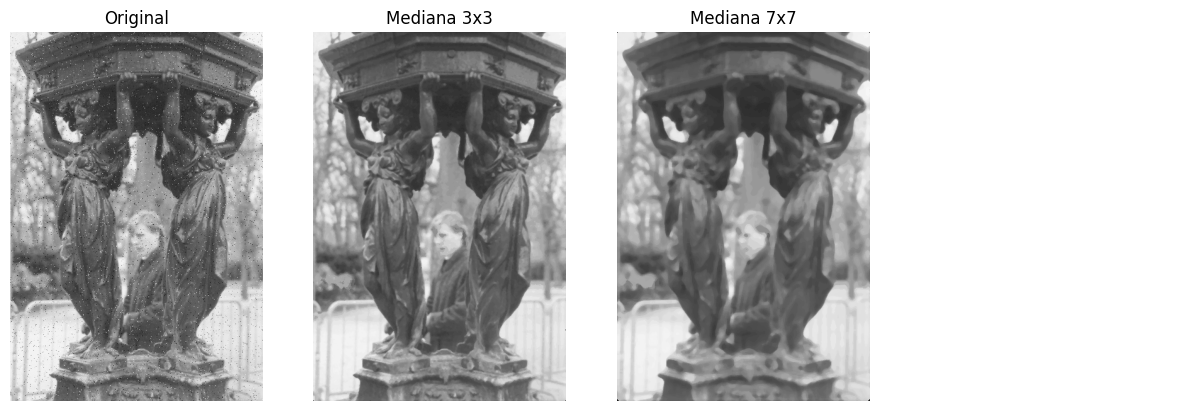

In [3]:
#  code here
img3 = cv2.imread("sta2noi2.png", cv2.IMREAD_GRAYSCALE)

# plt.imshow(img3, cmap='gray', vmin=0, vmax=255)

# Função para aplicar a convolução com uma máscara
def calcular_mediana(img, tamanho):
    altura_mascara = tamanho 
    largura_mascara = tamanho
    imagem_padded = adicionar_padding(img, altura_mascara, largura_mascara)
    resultado = np.zeros_like(img)

    # Aplicar a convolução manualmente
    for i in range(altura_mascara // 2, imagem_padded.shape[0] - altura_mascara // 2):
        for j in range(largura_mascara // 2, imagem_padded.shape[1] - largura_mascara // 2):
            janela = imagem_padded[i - altura_mascara // 2:i + altura_mascara // 2 + 1,
                                   j - largura_mascara // 2:j + largura_mascara // 2 + 1]
            resultado[i - altura_mascara // 2, j - largura_mascara // 2] = np.median(janela)
    
    return resultado

mediana_3x3 = calcular_mediana(img3, 3)
mediana_7x7 = calcular_mediana(img3, 7)

# Mostrar os resultados
fig, axs = plt.subplots(1, 4, figsize=(15, 5))

axs[0].imshow(img3, cmap='gray', vmin=0, vmax=255)
axs[0].set_title('Original')

axs[1].imshow(mediana_3x3, cmap='gray', vmin=0, vmax=255)
axs[1].set_title('Mediana 3x3')

axs[2].imshow(mediana_7x7, cmap='gray', vmin=0, vmax=255)
axs[2].set_title('Mediana 7x7')

for ax in axs:
    ax.axis('off')

plt.show()

4)	Aplique o filtro de Mediana para a imagem abaixo, que apresenta um ruído salt and pepper
- 3×3 filter;	7×7 filter

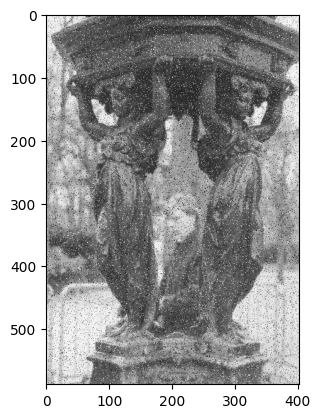

In [4]:
#  code here
img3 = cv2.imread("sta2noi1.png", cv2.IMREAD_GRAYSCALE)

plt.imshow(img3, cmap='gray', vmin=0, vmax=255)

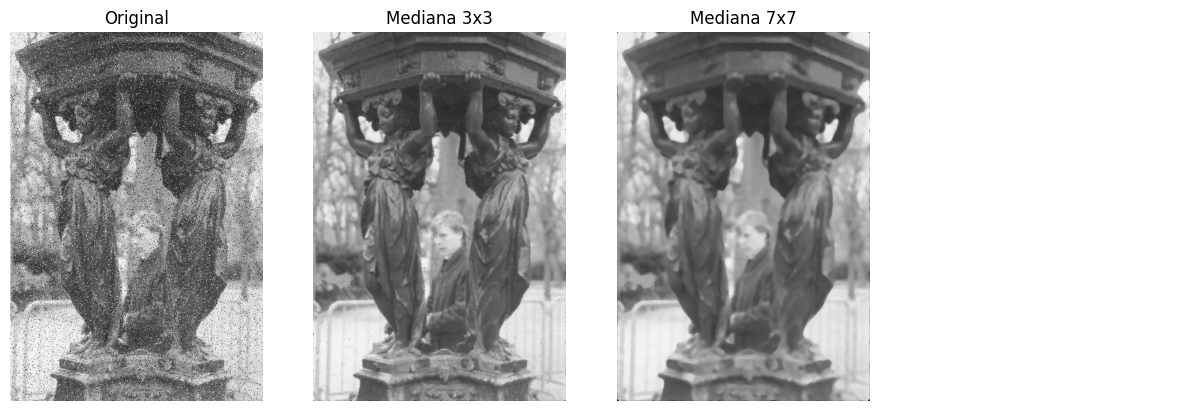

In [6]:
img3 = cv2.imread("sta2noi1.png", cv2.IMREAD_GRAYSCALE)

mediana_3x3 = calcular_mediana(img3, 3)
mediana_7x7 = calcular_mediana(img3, 7)

# Mostrar os resultados
fig, axs = plt.subplots(1, 4, figsize=(15, 5))

axs[0].imshow(img3, cmap='gray', vmin=0, vmax=255)
axs[0].set_title('Original')

axs[1].imshow(mediana_3x3, cmap='gray', vmin=0, vmax=255)
axs[1].set_title('Mediana 3x3')

axs[2].imshow(mediana_7x7, cmap='gray', vmin=0, vmax=255)
axs[2].set_title('Mediana 7x7')

for ax in axs:
    ax.axis('off')

plt.show()